In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
aerofit = pd.read_csv('aerofit_treadmill.csv')

In [145]:
aerofit.head()
#We can see that the data is already clean and there are no missing values by using max.rows options

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [10]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<AxesSubplot:xlabel='Age', ylabel='Product'>

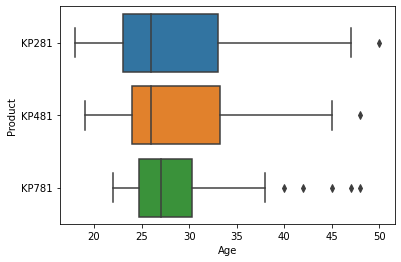

In [134]:
sns.boxplot(data=aerofit, x="Age", y='Product')
#Max sales can be infer between 18-33 where as only 1 outlier can be seen for KP281 & KP481
#Whereas for KP781 5 outliers can be seen above the age of 40 which indicates that 
#older segment prefer the premium segment of KP781, which mayb due to thier higher incomes

<AxesSubplot:xlabel='Income', ylabel='Product'>

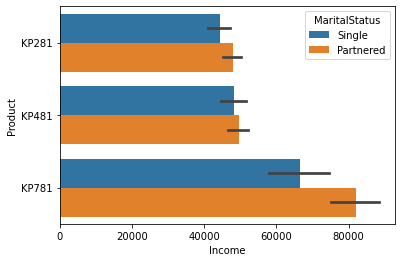

In [135]:
sns.barplot(data=aerofit, x="Income", y="Product", hue="MaritalStatus")
#from here we can clearly see that income grp buying KP781 is much higher
#Also it is clear that Partnered couples are earning more in general in comparision 
#to the Single people...So some customizations can be made accordingly

In [129]:
data_crosstab = pd.crosstab(aerofit['Product'], aerofit['Age'], margins = False)
pd.set_option('display.max_columns', None)
data_crosstab.loc['Total'] = data_crosstab.loc[:,:].sum()
data_crosstab['Total'] = data_crosstab.sum(axis=1)
data_crosstab

Age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,Total
Product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KP281,1,3,2,4,4,8,5,7,7,3,6,3,2,2,2,2,2,3,1,1,4,1,1,1,0,1,1,0,1,1,0,1,80
KP481,0,1,3,3,0,7,3,11,3,1,0,1,2,3,2,5,3,4,0,1,2,0,3,0,0,0,0,1,0,0,1,0,60
KP781,0,0,0,0,3,3,4,7,2,3,3,2,3,1,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,40
Total,1,4,5,7,7,18,12,25,12,7,9,6,7,6,4,8,6,8,1,2,7,1,5,1,1,1,1,2,1,2,2,1,180


In [133]:
#From the above data we can easily infer that
#KP281 was bought by 80 people
#KP481 was bought by 60 people
#KP781 was bought by 40 people
#Also we can clear see that the probabilty of 25 years old buying any product
#is much higher than the rest 25/180 -> 13.88%

In [142]:
data_crosstab = pd.crosstab(aerofit['Gender'], aerofit['Product'], margins = False)
data_crosstab.loc['Total'] = data_crosstab.loc[:,:].sum()
data_crosstab['Total'] = data_crosstab.sum(axis=1)
data_crosstab

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
Total,80,60,40,180


In [139]:
#Lets see the probabilties for Males & Females buying these products
#If we calculate conditional probabilities say...Given a person entered is Female
#Calculate the probability of her buying KP281 

#40/(40+29+7)-> 52.63%
#Similary for Products KP481 & KP781 -> 38.15% & 9.21% resp.
#these probabilites can be easily calculated by normalizing the index

In [16]:
#Probability of crosstab values
pd.crosstab(aerofit.Gender, aerofit.Product, normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


In [143]:
#Similarly can be done incase of people who are married or not
#Again we can also get the percentage of both partnered & single 
data_crosstab = pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], margins = False)
data_crosstab.loc['Total'] = data_crosstab.loc[:,:].sum()
data_crosstab['Total'] = data_crosstab.sum(axis=1)
data_crosstab

Product,KP281,KP481,KP781,Total
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
Total,80,60,40,180


In [144]:
#Probability of crosstab values
pd.crosstab(aerofit.MaritalStatus, aerofit.Product, normalize='index')

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


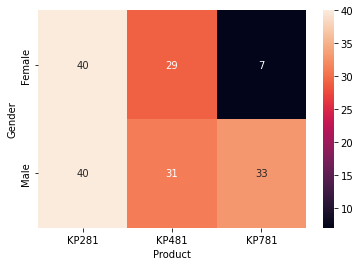

In [17]:
# plotting the heatmap
hm = sns.heatmap(data=data_crosstab,annot=True)
plt.show()

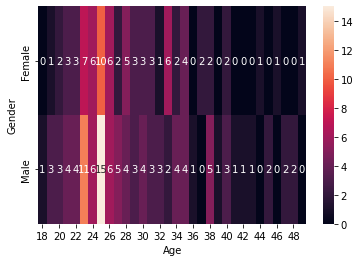

In [140]:
# plotting the heatmap
#Product	Age	Gender	Education	MaritalStatus	Usage	Fitness	Income	Miles
data_crosstab = pd.crosstab(aerofit['Gender'], aerofit['Age'], margins = False)
hm = sns.heatmap(data=data_crosstab,annot=True)
plt.show()

In [ ]:
# INSIGHTS & RECOMMENDATIONS

#1. First we can clearly see that people in the age of 23-26 are majority buyers of the product
# So we can increase the sales by targeting this segment by launching exiting offers or availing customizations

#2. Also we can clearly see that people with higher income groups are more inclined to buy K781
# as it falls in the premium segment and parteners more than single so people who are married and falling
# in high income category are more likely to buy K781

#3. Both male and females are likely to buy K281 & K481 but when it comes to K781 "Males" are more likely to
# buy this product so offers and customizations should be made available keeping this in mind